In [1]:
import sys
import numpy as np
from astropy.io import fits
from astroscrappy import detect_cosmics
from matplotlib import pyplot as plt 
sys.path.append('aspired')
import twodspec

In [2]:
# Example data from SPRAT
# BLAP-09
sprat_data = fits.open('examples/v_e_20180704_32_1_0_2.fits')[1].data

aspired/twodspec.py:95: RuntimeWarning: invalid value encountered in log10
  np.log10(img),
aspired/twodspec.py:108: RuntimeWarning: invalid value encountered in greater
  ax1.set_xlim(min(ztot[ztot>0]),max(ztot))


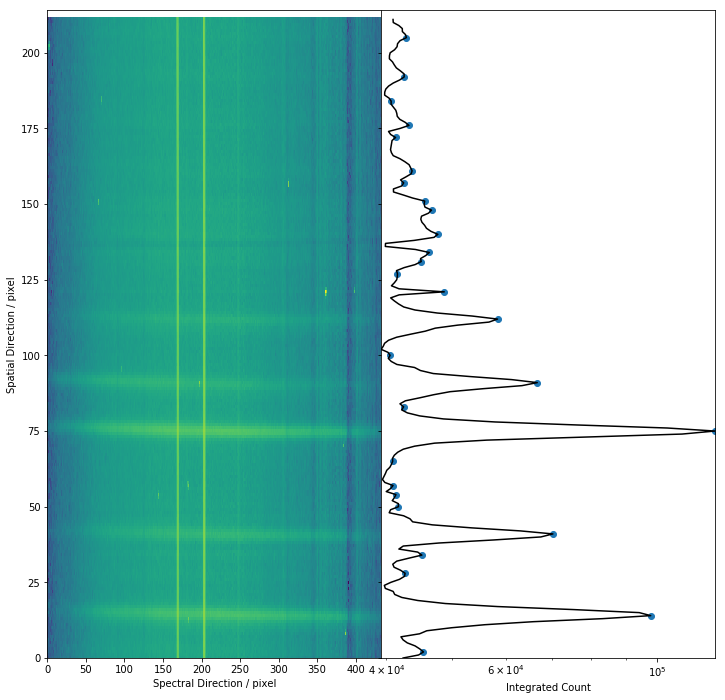

(array([ 75,  14,  41,  91, 112, 121, 140, 148, 134, 151,   2,  34, 131,
        161, 176, 205,  28, 192, 157,  83,  50, 127,  54, 172,  57,  65,
        184, 100]),
 array([121748.3359375 ,  97955.2265625 ,  70330.71875   ,  66700.328125  ,
         58303.4453125 ,  48677.890625  ,  47635.2578125 ,  46619.29296875,
         46269.5234375 ,  45555.0625    ,  45366.34375   ,  45119.5859375 ,
         45017.734375  ,  43653.81640625,  43194.4296875 ,  42817.09375   ,
         42629.7890625 ,  42494.484375  ,  42425.25      ,  42416.7890625 ,
         41680.7265625 ,  41542.046875  ,  41327.90234375,  41277.84375   ,
         40921.4921875 ,  40871.109375  ,  40665.1171875 ,  40517.28125   ]))

In [3]:
# (1) example of twodspec._find_peaks() without cosmic ray removal

# Set the spectral and spatial direction
Saxis = 1
Waxis = 0

# get the length in the spectral and spatial directions
spec_size = np.shape(sprat_data)[Waxis]
spatial_size = np.shape(sprat_data)[Saxis]

# the valid y-range of the chip (an array of int)
ydata = np.arange(spec_size)
ztot = np.sum(sprat_data, axis=Saxis)

# without
twodspec._find_peaks(sprat_data, spec_size, spatial_size, ydata, ztot, f_height=0.2, display=True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


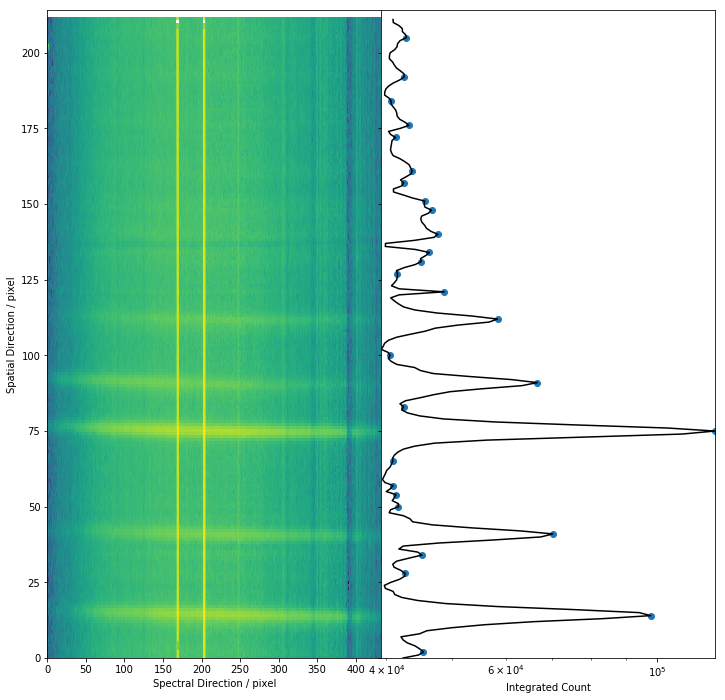

In [4]:
# (2) example of twodspec._find_peaks() with cosmic ray removal
peaks_y, heights_y = twodspec._find_peaks(detect_cosmics(sprat_data)[1], spec_size, spatial_size, ydata, ztot, f_height=0.2, display=True)

Tracing Aperture using nsteps=20
> Trace gaussian width = 1.540783785332331 pixels
> Trace gaussian width = 1.671708308573456 pixels
> Trace gaussian width = 1.3543125910843676 pixels
> Trace gaussian width = 1.4763973380604443 pixels
> Trace gaussian width = 1.1855044319759347 pixels


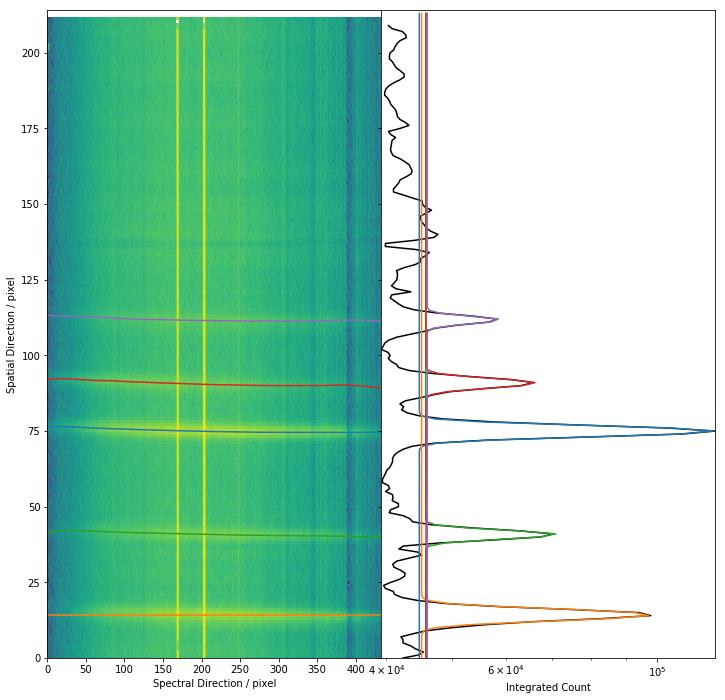

In [6]:
# (3) example of twodspec.ap_trace() with cosmic ray removal, selecting the 5 brightest spectra
my, y_sigma = twodspec.ap_trace(sprat_data, nsteps=20, fmask=(1, ), cosmic=True, n_spec=5,
             recenter=False, prevtrace=(0, ), bigbox=8, Saxis=1,
             nomessage=False, display=True)